<a href="https://colab.research.google.com/github/fell100/Machine-Learning/blob/master/2_regressao_linear_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch 

# Descrição

No último exercício fizemos a regressão linear para ajustar um modelo para dados gerados a partir da equação 

$y = 3x+2$

Agora, vamos partir para a tragédia anunciada e tentar usar os mesmos passos para a equação 

$y = 3x^2+2x+1$

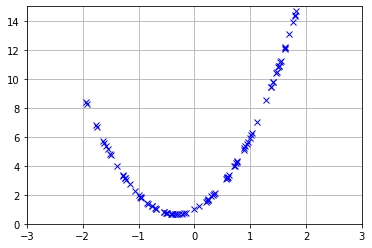

In [2]:
N = 100
# criar o vetor x com N valores entre -2 e 2
x = (np.random.rand(N)*4)-2
#cria o vetor y
y = 3*np.power(x,2)+2*x+1
plt.plot(x,y,'xb')
plt.grid('both')
plt.axis([-3,3,0,15]);

In [3]:
x_treino = np.array(x,dtype=np.float32)
x_treino = x_treino.reshape(-1,1)

y_treino = np.array(y,dtype=np.float32)
y_treino = y_treino.reshape(-1,1)


nEntrada = 1
nSaida = 1
modelo = torch.nn.Linear(nEntrada, nSaida) 

In [4]:
if torch.cuda.is_available():
  modelo.cuda()
  print('Ueba! Vamos de GPU')
else:
  print('Ok. Vamos de CPU')

Ok. Vamos de CPU


In [5]:
taxaAprendizagem = 0.01 

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(modelo.parameters(), lr=taxaAprendizagem)      

In [6]:
nEpocas = 150
erros=[]

for epoca in range(nEpocas):
  if torch.cuda.is_available():
    entradas = torch.tensor(x_treino).to('cuda')
    saidasEsperadas = torch.tensor(y_treino).to('cuda')
  else:
    entradas = torch.tensor(x_treino) #Variable(torch.from_numpy(x_treino))
    saidasEsperadas = torch.tensor(y_treino) #Variable(torch.from_numpy(y_treino))

  # A linha abaixo zera os gradientes calculados anteriormente, para não acumular informações
  optimizer.zero_grad()

      # calculamos a saída da rede
  saidas = modelo(entradas)

      # calcula o erro
  loss = criterion(saidas, saidasEsperadas)

      # calcula os gradientes
  loss.backward()

      # atualiza parâmetros 
  optimizer.step()

  erros.append(loss.item())

  if(not epoca%10):
    print('Época:' + str(epoca) + ' Erro: ' + str(loss.item()))

Época:0 Erro: 47.818782806396484
Época:10 Erro: 33.621185302734375
Época:20 Erro: 25.051311492919922
Época:30 Erro: 19.847362518310547
Época:40 Erro: 16.666950225830078
Época:50 Erro: 14.709924697875977
Época:60 Erro: 13.49706745147705
Época:70 Erro: 12.739849090576172
Época:80 Erro: 12.26354694366455
Época:90 Erro: 11.961688041687012
Época:100 Erro: 11.768965721130371
Época:110 Erro: 11.645033836364746
Época:120 Erro: 11.564784049987793
Época:130 Erro: 11.512481689453125
Época:140 Erro: 11.478184700012207


Observando o gráfico, percebemos que o erro caiu. Porém, está muito acima do que vimos para a equação liner.

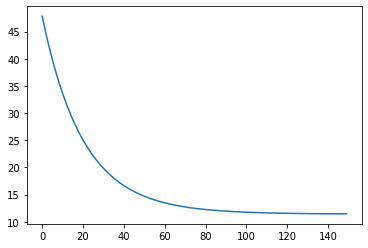

In [7]:
plt.plot(erros)

Podemos verificar a falha plotando o gráfico de $x$ versus a saída do modelo para esses valores.


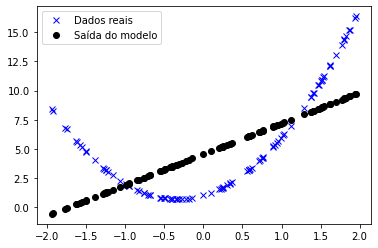

In [8]:
with torch.no_grad():# isso desabilita o cálculo de gradientes
  if torch.cuda.is_available():
    entradas = torch.tensor(x_treino).to('cuda')
  else:
    entradas = torch.tensor(x_treino)
  saidas = modelo(entradas)
  
plt.clf()
plt.plot(x_treino, y_treino, 'xb', label='Dados reais', lw=5)
plt.plot(x_treino, saidas, 'ko', label='Saída do modelo')
plt.legend(loc='best')
plt.show()

Como esperado, com um modelo linear, é impossível termos uma aproximação decente. Não é necessário sequer verificar como o modelo se comporta para dados desconhecidos.

Como esse é um problema para aprendizado, podemos alterar as entradas, incluindo os valores de $x^2$ e ajustando um novo modelo.

Note que o modelo ainda será linear:

$ w_0 x_0 + w_1 x_1 + b0$

mas, nesse caso, $x_0$ e $x_1$ tem os valores numéricos de $x$ e $x^2$, respectivamente.

In [9]:
x_treino = np.array(x,dtype=np.float32).reshape(-1,1)
x2 = np.array(np.power(x,2).reshape(-1,1),dtype=np.float32)
x_treino = np.concatenate((x_treino,x2),axis=1)

y_treino = np.array(y,dtype=np.float32)
y_treino = y_treino.reshape(-1,1)


nEntrada = 2
nSaida = 1
modelo = torch.nn.Linear(nEntrada, nSaida) 
if torch.cuda.is_available():
  modelo.cuda()
  print('Ueba! Vamos de GPU')
else:
  print('Ok. Vamos de CPU')
  taxaAprendizagem = 0.01 

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(modelo.parameters(), lr=taxaAprendizagem)  
nEpocas = 100
erros=[]
for epoca in range(nEpocas):
  if torch.cuda.is_available():
          #entradas = Variable(torch.from_numpy(x_treino).cuda())
    entradas = torch.tensor(x_treino).to('cuda')
          #saidasEsperadas = Variable(torch.from_numpy(y_treino).cuda())
    saidasEsperadas = torch.tensor(y_treino).to('cuda')
  else:
    entradas = torch.tensor(x_treino) #Variable(torch.from_numpy(x_treino))
    saidasEsperadas = torch.tensor(y_treino) #Variable(torch.from_numpy(y_treino))

      # A linha abaixo zera os gradientes calculados anteriormente, para não acumular informações
  optimizer.zero_grad()

      # calculamos a saída da rede
  saidas = modelo(entradas)

      # calcula o erro
  loss = criterion(saidas, saidasEsperadas)

      # calcular os gradientes
  loss.backward()

      # atualiza parâmetros 
  optimizer.step()

  erros.append(loss.item())

  if(not epoca%10):
    print('Época:' + str(epoca) + ' Erro: ' + str(loss.item()))

Ok. Vamos de CPU
Época:0 Erro: 50.767616271972656
Época:10 Erro: 12.087616920471191
Época:20 Erro: 3.391343116760254
Época:30 Erro: 1.2657417058944702
Época:40 Erro: 0.6418616771697998
Época:50 Erro: 0.39902153611183167
Época:60 Erro: 0.2751968204975128
Época:70 Erro: 0.2005462497472763
Época:80 Erro: 0.15155459940433502
Época:90 Erro: 0.11783646792173386


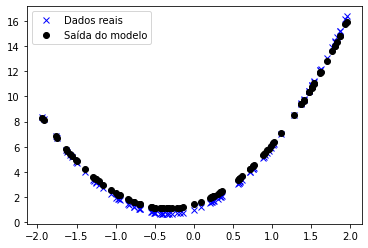

In [10]:
with torch.no_grad():# isso desabilita o cálculo de gradientes
  if torch.cuda.is_available():
    entradas = torch.tensor(x_treino).to('cuda')
  else:
    entradas = torch.tensor(x_treino)
  saidas = modelo(entradas)

plt.clf()
plt.plot(x_treino[:,0], y_treino, 'xb', label='Dados reais', lw=5)
plt.plot(x_treino[:,0], saidas, 'ko', label='Saída do modelo')
plt.legend(loc='best')
plt.show()

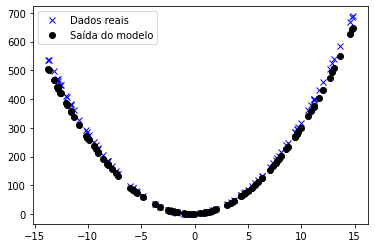

In [11]:
#Vamos testar para dados não vistos
xt = (np.random.rand(N)*30)-15
#cria o vetor y
yt = 3*np.power(xt,2)+2*xt+1

x_teste = np.array(xt,dtype=np.float32).reshape(-1,1)
x2 = np.array(np.power(xt,2).reshape(-1,1),dtype=np.float32)
x_teste = np.concatenate((x_teste,x2),axis=1)

y_teste = np.array(yt,dtype=np.float32)
y_teste = y_teste.reshape(-1,1)

with torch.no_grad():# isso desabilita o cálculo de gradientes
  if torch.cuda.is_available():
    entradas = torch.tensor(x_teste).to('cuda')
  else:
    entradas = torch.tensor(x_teste)
  saidas = modelo(entradas)


plt.clf()
plt.plot(x_teste[:,0], y_teste, 'xb', label='Dados reais', lw=5)
plt.plot(x_teste[:,0], saidas, 'ko', label='Saída do modelo')
plt.legend(loc='best')
plt.show()

Apesar de ainda ser linear, obviamente o modelo funcionou (mesmo para dados desconhecidos), uma vez que o termo de ordem dois foi inserido como entrada. 

Mas você deve ter em mente que esse é um exemplo simples e do qual tínhamos conhecimento prévio sobre a ordem apropriada. Um problema real pode ter milhares de entradas e é inviável tentarmos as várias possibilidades de ordem de polinômio.

Para se ter uma ideia, vamos acrescentar $x^3$ à entrada e verificar o que ocorre.

Ok. Vamos de CPU
Época:0 Erro: 45.117069244384766
Época:10 Erro: 8.987418174743652
Época:20 Erro: 2.637551784515381
Época:30 Erro: 0.9811702966690063
Época:40 Erro: 0.523699939250946
Época:50 Erro: 0.3837010860443115
Época:60 Erro: 0.32892730832099915
Época:70 Erro: 0.29797011613845825
Época:80 Erro: 0.27451831102371216
Época:90 Erro: 0.2541739046573639


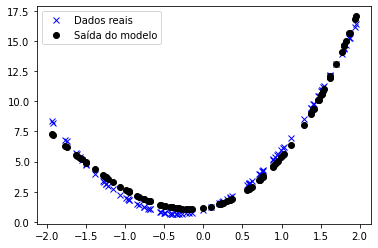

In [12]:
x_treino = np.array(x,dtype=np.float32).reshape(-1,1)
x2 = np.array(np.power(x,2).reshape(-1,1),dtype=np.float32)
x3 = np.array(np.power(x,3).reshape(-1,1),dtype=np.float32)
x_treino = np.concatenate((x_treino,x2,x3),axis=1)

y_treino = np.array(y,dtype=np.float32)
y_treino = y_treino.reshape(-1,1)


nEntrada = 3
nSaida = 1
modelo = torch.nn.Linear(nEntrada, nSaida) 
if torch.cuda.is_available():
  modelo.cuda()
  print('Ueba! Vamos de GPU')
else:
  print('Ok. Vamos de CPU')
  taxaAprendizagem = 0.01 

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(modelo.parameters(), lr=taxaAprendizagem)  
nEpocas = 100
erros=[]
for epoca in range(nEpocas):
  if torch.cuda.is_available():
    entradas = torch.tensor(x_treino).to('cuda')
    saidasEsperadas = torch.tensor(y_treino).to('cuda')
  else:
    entradas = torch.tensor(x_treino) #Variable(torch.from_numpy(x_treino))
    saidasEsperadas = torch.tensor(y_treino) #Variable(torch.from_numpy(y_treino))

      # A linha abaixo zera os gradientes calculados anteriormente, para não acumular informações
  optimizer.zero_grad()

      # calculamos a saída da rede
  saidas = modelo(entradas)

      # calcula o erro
  loss = criterion(saidas, saidasEsperadas)

      # calcular os gradientes
  loss.backward()

      # atualiza parâmetros 
  optimizer.step()

  erros.append(loss.item())

  if(not epoca%10):
    print('Época:' + str(epoca) + ' Erro: ' + str(loss.item()))

with torch.no_grad():# isso desabilita o cálculo de gradientes
  if torch.cuda.is_available():
    entradas = torch.tensor(x_treino).to('cuda')
  else:
    entradas = torch.tensor(x_treino)
  saidas = modelo(entradas)

plt.clf()
plt.plot(x_treino[:,0], y_treino, 'xb', label='Dados reais', lw=5)
plt.plot(x_treino[:,0], saidas, 'ko', label='Saída do modelo')
plt.legend(loc='best')
plt.show()    

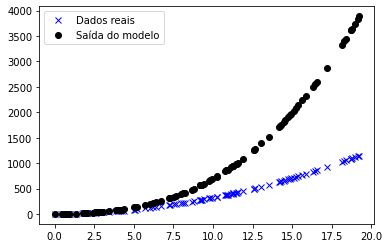

In [13]:
#Vamos testar para dados não vistos
xt = (np.random.rand(N)*20)
#cria o vetor y
yt = 3*np.power(xt,2)+2*xt+1

x_teste = np.array(xt,dtype=np.float32).reshape(-1,1)
x2 = np.array(np.power(xt,2).reshape(-1,1),dtype=np.float32)
x3 = np.array(np.power(xt,3).reshape(-1,1),dtype=np.float32)
x_teste = np.concatenate((x_teste,x2,x3),axis=1)

y_teste = np.array(yt,dtype=np.float32)
y_teste = y_teste.reshape(-1,1)

with torch.no_grad():# isso desabilita o cálculo de gradientes
  if torch.cuda.is_available():
    entradas = torch.tensor(x_teste).to('cuda')
  else:
    entradas = torch.tensor(x_teste)
  saidas = modelo(entradas)


plt.clf()
plt.plot(x_teste[:,0], y_teste, 'xb', label='Dados reais', lw=5)
plt.plot(x_teste[:,0], saidas, 'ko', label='Saída do modelo')
plt.legend(loc='best')
plt.show()

Supondo desconhecimento de qual a ordem adequada da função a ser aproximada, ao inserir uma entrada para ordem 3, o modelo não se mostra confiável para dados desconhecidos.

Além disso, suponha um problema com 100 entradas e vamos tentar usar entradas equivalentes à segunda ordem ($x_0^2$, $x_0 x_1$, $x_0 x_2$...). Percebemos ser uma abordagem pouco eficiente.

Agora, imagine para um modelo de 800 entradas (não é raro) e se for necessário tentar combinações de ordem 3 ($x_0^3$, $x_0 x_1 x_2$, $x_0 x_1 x_3$...).

## **O que vimos**

A limitação ao se utilizar a regressão linear e uma forma pouco prática de contornar o problema em casos reais.